In [2]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import random
from sklearn import datasets, linear_model


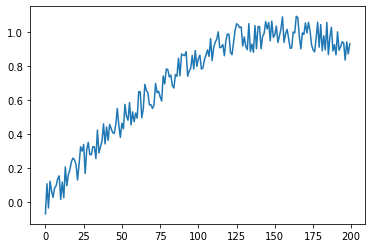

In [80]:
alfa = 200
y = [math.sin(i/100)+random.uniform(-0.1,0.1) for i in range(alfa)]
x = [i for i in range(alfa)]
plt.plot(x, y)

In [81]:
def tailor(x=0):   
    a0 = x
    a1 = -x**3/math.factorial(3)+random.uniform(-0.1,0.1)
    a2 = x**5/math.factorial(5)+random.uniform(-0.1,0.1)
    a3 = -x**7/math.factorial(7)+random.uniform(-0.1,0.1)
    return [a0,a1,a2,a3]
    

In [82]:
def sum_array(arr=[0]):
    s = 0
    for r in arr:
        s+= r
    return s

In [83]:
yy = [sum_array(tailor(i/100)) for i in range(alfa)]

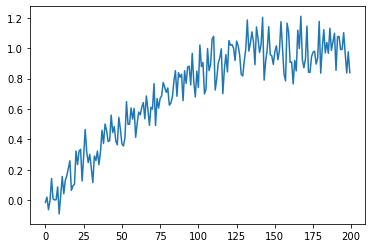

In [84]:
plt.plot(x, yy)

In [85]:
X_0 = [[(i/100),(i/100)**3,(i/100)**5,(i/100)**7] for i in range(alfa)]
X = pd.DataFrame(X_0)
X

,0,1,2,3
0,0.00,0.000000,0.000000e+00,0.000000e+00
1,0.01,0.000001,1.000000e-10,1.000000e-14
2,0.02,0.000008,3.200000e-09,1.280000e-12
3,0.03,0.000027,2.430000e-08,2.187000e-11
4,0.04,0.000064,1.024000e-07,1.638400e-10
...,...,...,...,...
195,1.95,7.414875,2.819506e+01,1.072117e+02
196,1.96,7.529536,2.892547e+01,1.111201e+02
197,1.97,7.645373,2.967093e+01,1.151499e+02
198,1.98,7.762392,3.043168e+01,1.193044e+02


In [86]:
coeff = [1,-1/math.factorial(3),1/math.factorial(5),-1/math.factorial(7)]
coeff

[1, -0.16666666666666666, 0.008333333333333333, -0.0001984126984126984]

In [87]:
regr = linear_model.LinearRegression()
regr.fit(X, y)

LinearRegression()

In [88]:
print('Coefficients: \n', regr.coef_)

Coefficients: 
 [ 0.92750854 -0.08517092 -0.02683512  0.00438701]


In [89]:
alfa2 = 314

In [90]:
def predicted_line(ii):
    return regr.predict([[(ii/100),(ii/100)**3,(ii/100)**5,(ii/100)**7]])
y_pred = [predicted_line(i)[0] for i in range(alfa2)]

In [91]:
y_sin = [math.sin(i/100) for i in range(alfa2)]

In [92]:
x_sin = [i for i in range(alfa2)]

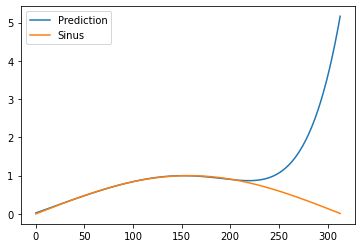

In [93]:
plt.plot(x_sin, y_pred)
plt.plot(x_sin, y_sin)
plt.legend(["Prediction", "Sinus"])

In [77]:
y_pred = np.array(y_pred)
y_sin = np.array(y_sin)
regr.score(X_0,y_sin)

ValueError: Found input variables with inconsistent numbers of samples: [314, 140]

In [96]:
ii = 314
x_pred = [[(ii/100),(ii/100)**3,(ii/100)**5,(ii/100)**7]]
regr.predict(x_pred)[0]

5.311259859971874